In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
demography_claim_csv_path = "/content/drive/My Drive/demography_claim.csv"

In [5]:
import pandas as pd
demography_claim_data = pd.read_csv(demography_claim_csv_path)

In [ ]:
demography_claim_data = pd.read_csv(demography_claim_csv_path)

In [ ]:
print("\nDemography Claim Data:")
print(demography_claim_data.head())


Demography Claim Data:
                                     id firstName lastName  gender  \
0  f70c7cea-d533-48ff-999e-d8ae2dfbdb7d   Alberta  Gerhold  FEMALE   
1  51b5e30c-cf7c-463b-874c-35b935257049   Dorothy     Rice    MALE   
2  5819dcde-d9a9-4bba-9ce5-6eb92c0b9194    Brandy  Pollich  FEMALE   
3  026ec986-620b-41e5-9fc2-f9dc4d2247d2   Phyllis  Monahan  FEMALE   
4  17469904-7dd7-466d-9090-eba19a6f31dc     Daisy    Kuhic  FEMALE   

                  facilityName    scheme medicationCode   medicationName  \
0            Nkridgegridgewood      RAMA          35641     OVARIECTOMIE   
1                     Forttown  MUTUELLE          30631   HYDROCELECTOMY   
2                Port Birmills      RAMA          35641     OVARIECTOMIE   
3  North Lusland With Bathdsor      RAMA          35641     OVARIECTOMIE   
4                    Cetersrye      RAMA          35641     OVARIECTOMIE   

             admissionDate            dischargeDate   diagnosisCode  \
0  2024-02-12 04:56:20.699 

In [6]:
import pandas as pd

# Calculate summary statistics for 'billedAmount'
billed_mean = demography_claim_data['billedAmount'].mean()
billed_median = demography_claim_data['billedAmount'].median()
billed_min = demography_claim_data['billedAmount'].min()
billed_max = demography_claim_data['billedAmount'].max()
billed_total = demography_claim_data['billedAmount'].sum()

# Calculate summary statistics for 'paidAmount'
paid_mean = demography_claim_data['paidAmount'].mean()
paid_median = demography_claim_data['paidAmount'].median()
paid_min = demography_claim_data['paidAmount'].min()
paid_max = demography_claim_data['paidAmount'].max()
paid_total = demography_claim_data['paidAmount'].sum()

# Print the summary statistics
print("BilledAmount Summary:")
print("Mean:", billed_mean)
print("Median:", billed_median)
print("Minimum:", billed_min)
print("Maximum:", billed_max)
print("Total:", billed_total)

print("\nPaidAmount Summary:")
print("Mean:", paid_mean)
print("Median:", paid_median)
print("Minimum:", paid_min)
print("Maximum:", paid_max)
print("Total:", paid_total)



BilledAmount Summary:
Mean: 252618.5403231218
Median: 189280.0
Minimum: 5
Maximum: 1000000
Total: 489410529095

PaidAmount Summary:
Mean: 126331.90466100602
Median: 70021.0
Minimum: 1
Maximum: 985496
Total: 244749115495


<ipython-input-7-d7e5e67be638>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='billedAmount', y='diagnosisCode', data=top_5_diagnoses_billed, palette='viridis')


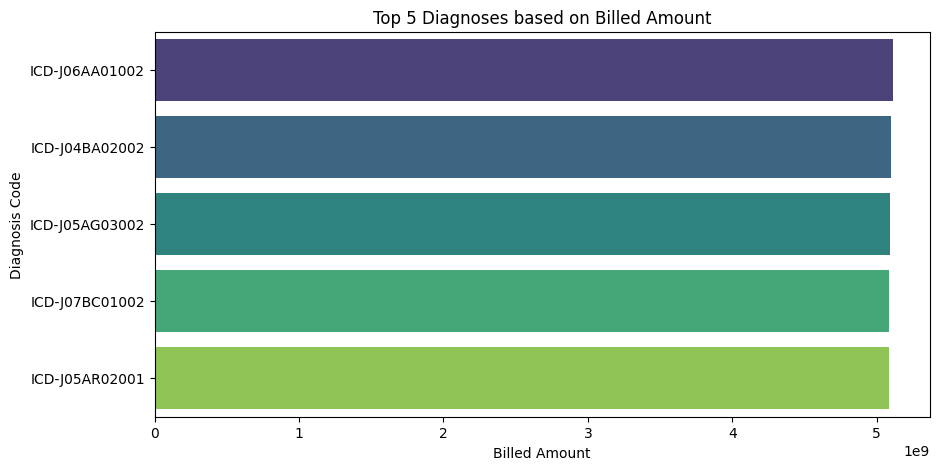

<ipython-input-7-d7e5e67be638>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='paidAmount', y='diagnosisCode', data=top_5_diagnoses_paid, palette='viridis')


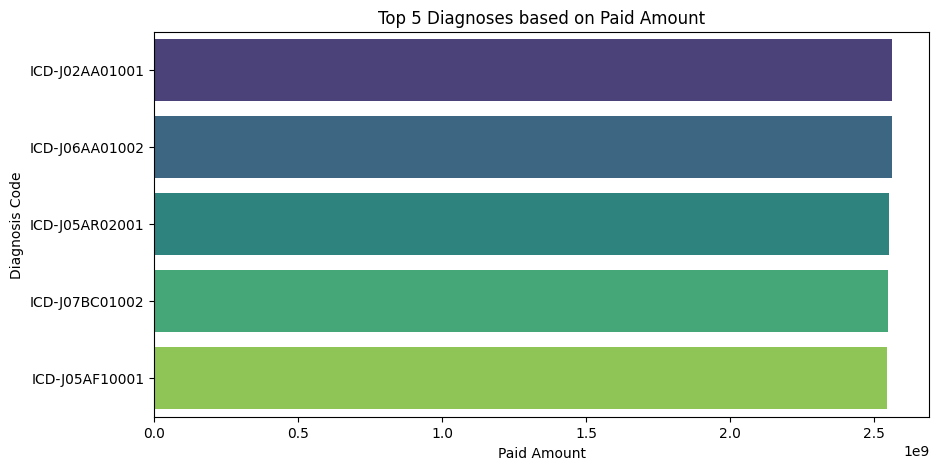

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'diagnosisCode', 'billedAmount', and 'paidAmount' are columns in your DataFrame
# Group by diagnosis and calculate total billed and paid amounts
diagnosis_summary = demography_claim_data.groupby('diagnosisCode').agg({'billedAmount': 'sum', 'paidAmount': 'sum'}).reset_index()

# Sort diagnoses based on billed and paid amounts
diagnosis_summary_sorted_billed = diagnosis_summary.sort_values(by='billedAmount', ascending=False)
diagnosis_summary_sorted_paid = diagnosis_summary.sort_values(by='paidAmount', ascending=False)

# Select top 5 diagnoses
top_5_diagnoses_billed = diagnosis_summary_sorted_billed.head(5)
top_5_diagnoses_paid = diagnosis_summary_sorted_paid.head(5)

# Visualize top 5 diagnoses based on billed amount
plt.figure(figsize=(10, 5))
sns.barplot(x='billedAmount', y='diagnosisCode', data=top_5_diagnoses_billed, palette='viridis')
plt.title('Top 5 Diagnoses based on Billed Amount')
plt.xlabel('Billed Amount')
plt.ylabel('Diagnosis Code')
plt.show()

# Visualize top 5 diagnoses based on paid amount
plt.figure(figsize=(10, 5))
sns.barplot(x='paidAmount', y='diagnosisCode', data=top_5_diagnoses_paid, palette='viridis')
plt.title('Top 5 Diagnoses based on Paid Amount')
plt.xlabel('Paid Amount')
plt.ylabel('Diagnosis Code')
plt.show()


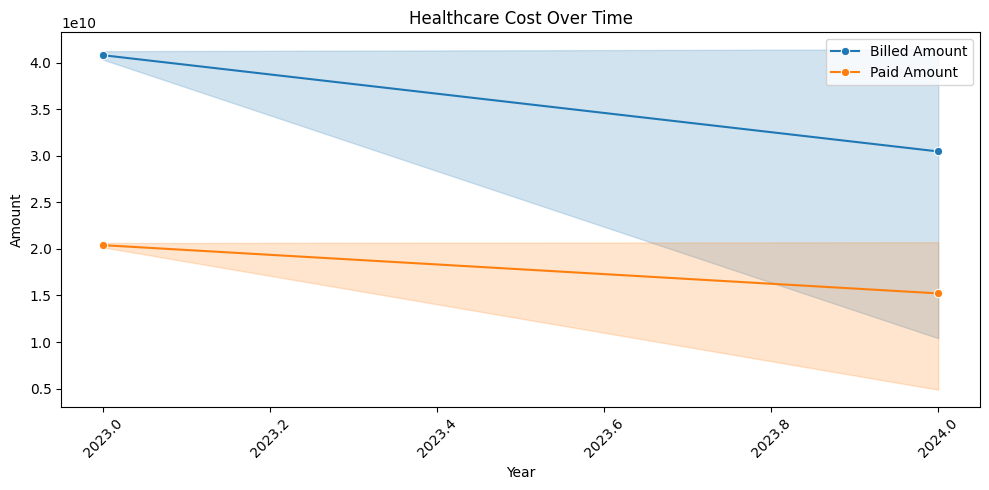

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'admissionDate' to datetime format
demography_claim_data['admissionDate'] = pd.to_datetime(demography_claim_data['admissionDate'], errors='coerce')

# Extract month and year from 'admissionDate'
demography_claim_data['month'] = demography_claim_data['admissionDate'].dt.month
demography_claim_data['year'] = demography_claim_data['admissionDate'].dt.year

# Drop rows with missing or invalid dates
demography_claim_data.dropna(subset=['admissionDate'], inplace=True)

# Group by month and year and calculate total billed and paid amounts
monthly_summary = demography_claim_data.groupby(['year', 'month']).agg({'billedAmount': 'sum', 'paidAmount': 'sum'}).reset_index()

# Plot total billed and paid amounts over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_summary, x='year', y='billedAmount', marker='o', label='Billed Amount')
sns.lineplot(data=monthly_summary, x='year', y='paidAmount', marker='o', label='Paid Amount')
plt.title('Healthcare Cost Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


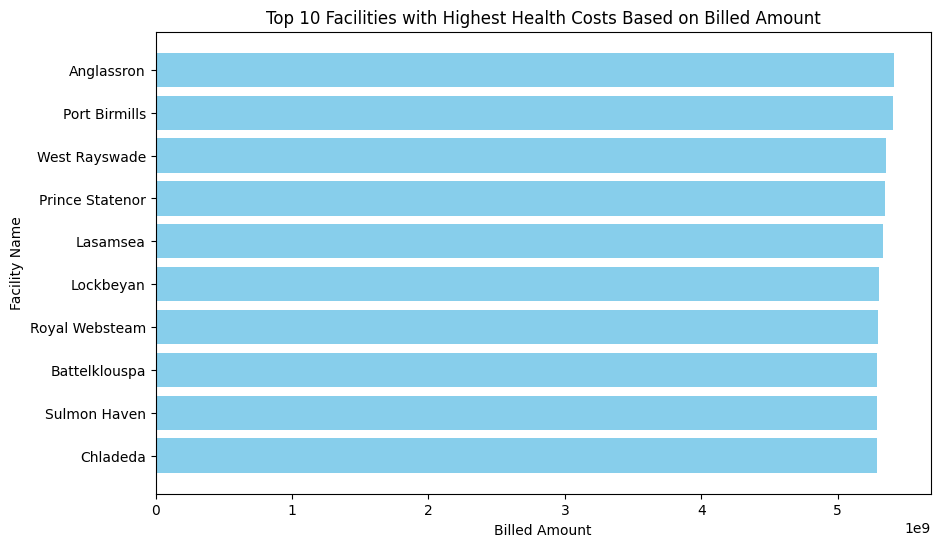

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'facilityName' and 'billedAmount' are columns in your DataFrame

# Group by facility name and calculate total billed amounts
facility_summary = demography_claim_data.groupby('facilityName')['billedAmount'].sum().reset_index()

# Sort the facilities by billed amount in descending order and select the top 10
top_10_facilities = facility_summary.nlargest(10, 'billedAmount')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_facilities['facilityName'], top_10_facilities['billedAmount'], color='skyblue')
plt.xlabel('Billed Amount')
plt.ylabel('Facility Name')
plt.title('Top 10 Facilities with Highest Health Costs Based on Billed Amount')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest cost at the top
plt.show()


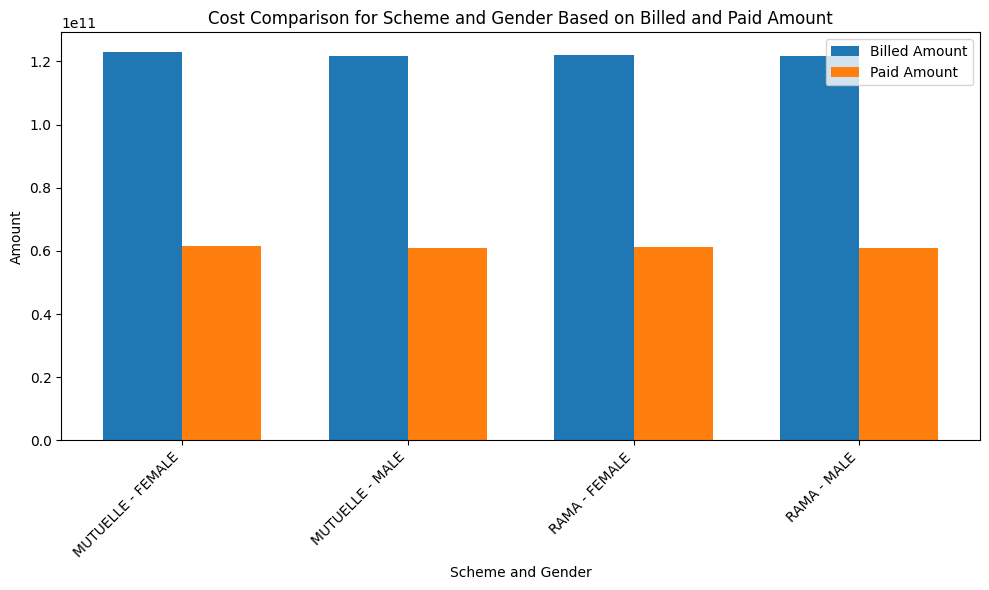

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'scheme', 'gender', 'billedAmount', and 'paidAmount' are columns in your DataFrame

# Group by scheme and gender, and calculate total billed and paid amounts
grouped_summary = demography_claim_data.groupby(['scheme', 'gender'])[['billedAmount', 'paidAmount']].sum().reset_index()

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Position of bars on x-axis
index = grouped_summary.index

# Plot bars for billed amounts
ax.bar(index - bar_width/2, grouped_summary['billedAmount'], bar_width, label='Billed Amount')

# Plot bars for paid amounts
ax.bar(index + bar_width/2, grouped_summary['paidAmount'], bar_width, label='Paid Amount')

# Set labels, title, and ticks
ax.set_xlabel('Scheme and Gender')
ax.set_ylabel('Amount')
ax.set_title('Cost Comparison for Scheme and Gender Based on Billed and Paid Amount')
ax.set_xticks(index)
ax.set_xticklabels([f"{scheme} - {gender}" for scheme, gender in zip(grouped_summary['scheme'], grouped_summary['gender'])], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


***Recommendations***

Examine the underlying factors contributing to disparities in healthcare expenditure between genders. This investigation aims to pinpoint specific areas for targeted interventions or healthcare management initiatives tailored to distinct demographic segments.

Scrutinize discrepancies in payment validation processes to discern reasons for instances where the amount paid exceeds the verified sum. Ensuring precision and transparency in financial transactions is imperative for maintaining integrity.

Delve deeper into diagnoses and medications associated with high costs, in collaboration with healthcare providers. This collaborative effort seeks to uncover opportunities for cost containment, such as negotiating competitive prices or exploring alternative therapeutic options.

Assess facilities with notably high billing amounts to elucidate the factors driving their elevated costs. By understanding these contributors, we can identify avenues for implementing cost-saving strategies and optimizing resource allocation.

Conduct a comprehensive analysis of insurance scheme benefits, coverage, and utilization patterns. This analysis will inform resource distribution and policy adjustments aimed at enhancing cost-effectiveness and fostering equitable access to healthcare services.
